--- Описание набора данных ---
Назначение: Прогнозирование того, совершит ли посетитель покупку (Revenue) на основе его поведения на сайте.
Описание признаков:
* Administrative, Informational, ProductRelated: Количество посещенных страниц и длительность пребывания.
* BounceRates, ExitRates: Показатели отказов и выходов.
* VisitorType: Тип посетителя (New_Visitor, Returning_Visitor, Other).
* Weekend: Является ли день визита выходным (True/False).
* Revenue: Целевая переменная, факт покупки (True/False).

Данные успешно загружены. Размерность данных: (2277, 18)

--- Расчет вероятностей ---
Используемая формула условной вероятности:
P(A|B) = P(A ∩ B) / P(B)
------------------------------------------------------------

Условная вероятность покупки в зависимости от типа посетителя P(Revenue | VisitorType):
------------------------------------------------------------
VisitorType
New_Visitor          0.167
Returning_Visitor    0.089
Name: Revenue_Numeric, dtype: float64

--- Визуализация рез

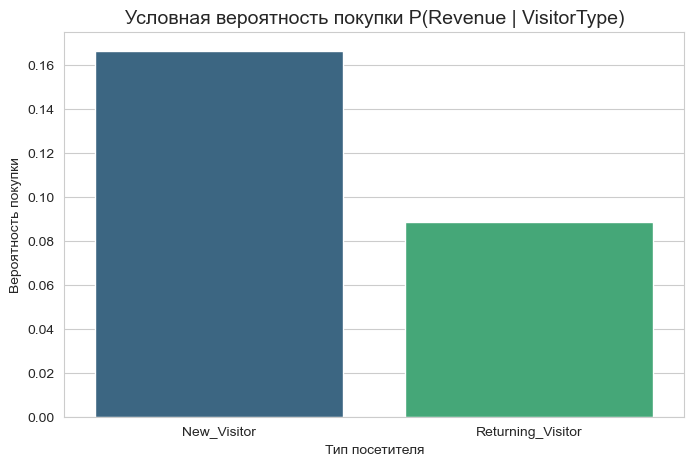

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style("whitegrid") 

print("--- Описание набора данных ---")
print("Назначение: Прогнозирование того, совершит ли посетитель покупку (Revenue) на основе его поведения на сайте.")
print("Описание признаков:")
print("* Administrative, Informational, ProductRelated: Количество посещенных страниц и длительность пребывания.")
print("* BounceRates, ExitRates: Показатели отказов и выходов.")
print("* VisitorType: Тип посетителя (New_Visitor, Returning_Visitor, Other).")
print("* Weekend: Является ли день визита выходным (True/False).")
print("* Revenue: Целевая переменная, факт покупки (True/False).")

try:
    data = pd.read_csv("untitled.csv") 
    print(f"\nДанные успешно загружены. Размерность данных: {data.shape}")
except FileNotFoundError:
    print("Ошибка: файл 'untitled.csv' не найден.")
    exit()

data['Revenue_Numeric'] = data['Revenue'].astype(int)

print("\n--- Расчет вероятностей ---")
print("Используемая формула условной вероятности:")
print("P(A|B) = P(A ∩ B) / P(B)")
print("-" * 60)

prob_by_visitor = data.groupby('VisitorType')['Revenue_Numeric'].mean().sort_values(ascending=False)

print("\nУсловная вероятность покупки в зависимости от типа посетителя P(Revenue | VisitorType):")
print("-" * 60)
print(prob_by_visitor.round(3))

print("\n--- Визуализация результатов ---")
print("Графическое представление вероятностей:")

plt.figure(figsize=(8, 5))
sns.barplot(x=prob_by_visitor.index, y=prob_by_visitor.values, hue=prob_by_visitor.index, palette="viridis", legend=False)
plt.title('Условная вероятность покупки P(Revenue | VisitorType)', fontsize=14)
plt.xlabel('Тип посетителя')
plt.ylabel('Вероятность покупки')
plt.show()
